# Importing the required python modules and reading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('drug200.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# From above info we can see that the dataset has 200 rows in which there are no null values and 6 columns in total. Also the datatype of the columns are correct as per the values containing in it

In [5]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


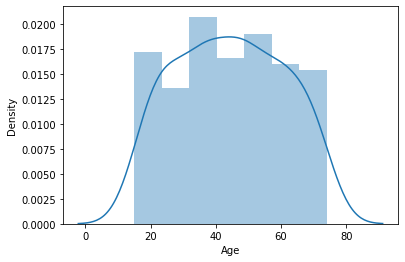

In [6]:
sns.distplot(df['Age'])
plt.show()

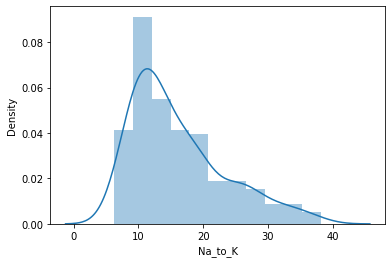

In [7]:
sns.distplot(df['Na_to_K'])
plt.show()

# From the above histogram plots and the describe function we can see that the data in Age column is uniformly distributed as seen that the mean and median values are close to each other where as there are some outliers in Na_to_K column

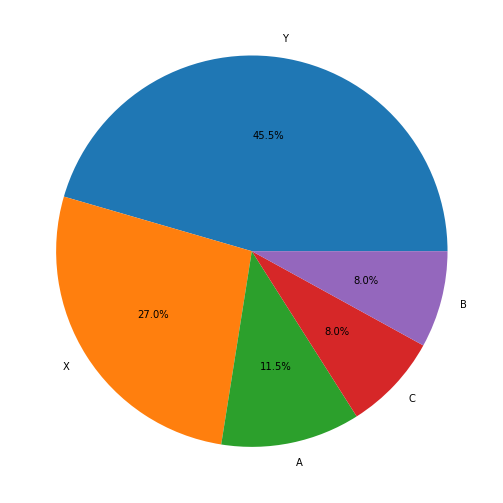

In [8]:
plt.figure(figsize=(9,9))
plt.pie(df['Drug'].value_counts(),labels=['Y','X','A','C','B'],autopct='%1.1f%%')
plt.show()

# The above pie chart shows that most of the patient responded to drug Y i.e. 45.5% and going in descending order X,A,C,B which are 27%,11.5%,8%,8% respectively

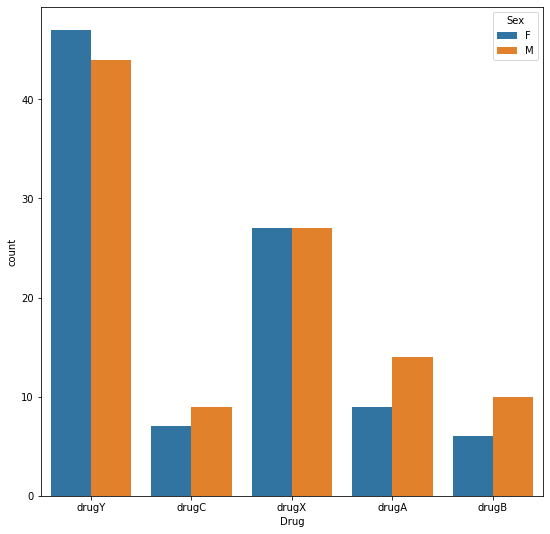

In [9]:
plt.figure(figsize=(9,9))
sns.countplot(data=df,x='Drug',hue='Sex')
plt.show()

# Here in the countplot we can see that as most persons responded to drug Y which is around 45% of total,both genders have equal response to drug Y.It is also same in case of drug X. But in remaining drugs which are A,B and C males responded more positively than females

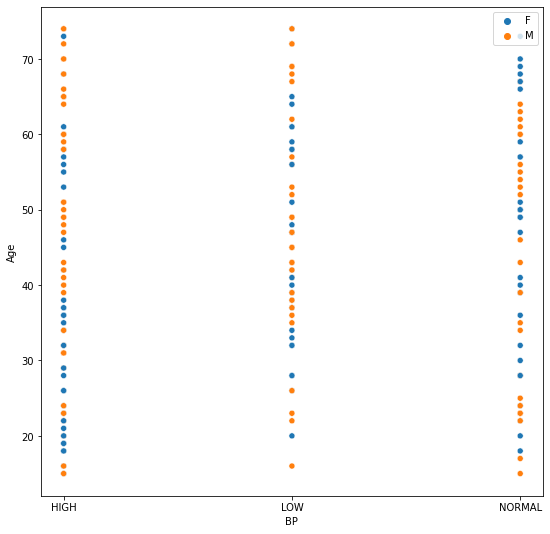

In [10]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=df,x='BP',y='Age',hue='Sex')
plt.legend()
plt.show()

# The above scatter plot shows that the blood pressure categores between male and female are evenly scattered i.e there are both males and females present evenly across all 3 categories

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


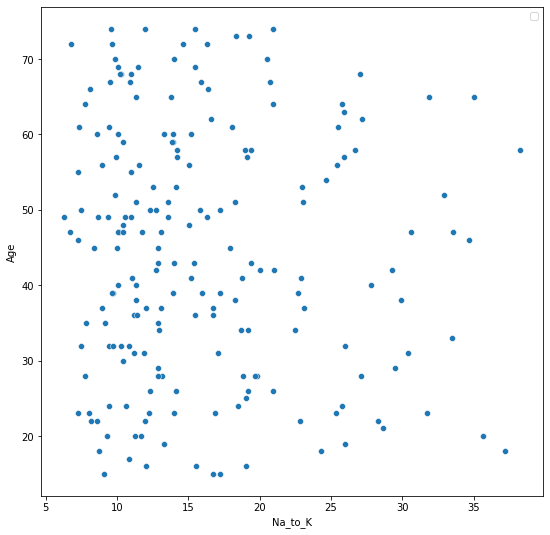

In [11]:
plt.figure(figsize=(9,9))
sns.scatterplot(data=df,x='Na_to_K',y='Age')
plt.legend()
plt.show()

# The above scatterplot shows us that there is not relationship between features i.e. both Age and Na_to_K ratio columns are independent of each other

In [12]:
df.corr()

,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


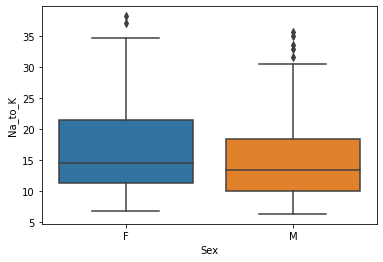

In [13]:
sns.boxplot(data=df,x='Sex',y='Na_to_K')
plt.show()

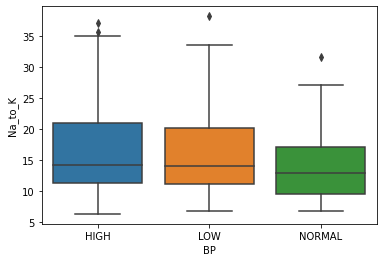

In [14]:
sns.boxplot(data=df,x='BP',y='Na_to_K')
plt.show()

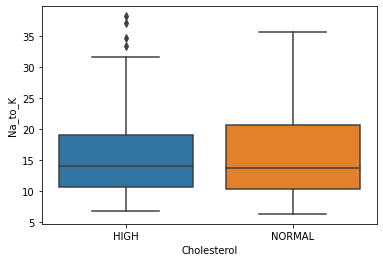

In [15]:
sns.boxplot(data=df,x='Cholesterol',y='Na_to_K')
plt.show()

# Of the above boxplots most of outliers lie when Na_to_K ration is compared to Gender column so we will remove only that

In [16]:
df[(df['Sex']=='M')&(df['Na_to_K']>30)]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
22,47,M,LOW,NORMAL,30.568,drugY
26,31,M,HIGH,HIGH,30.366,drugY
48,23,M,NORMAL,HIGH,31.686,drugY
98,20,M,HIGH,NORMAL,35.639,drugY
128,47,M,LOW,NORMAL,33.542,drugY
131,52,M,LOW,NORMAL,32.922,drugY
188,65,M,HIGH,NORMAL,34.997,drugY


In [17]:
df[(df['Sex']=='F')&(df['Na_to_K']>35)]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
96,58,F,LOW,HIGH,38.247,drugY
184,18,F,HIGH,HIGH,37.188,drugY


In [18]:
df.drop([22,26,48,98,128,131,188,96,184],inplace=True)

In [19]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


# Separating Input and Output variables

In [20]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1:]

In [21]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


In [22]:
y

,Drug
0,drugY
1,drugC
2,drugC
3,drugX
4,drugY
...,...
195,drugC
196,drugC
197,drugX
198,drugX


# Encoding Categorical Data

In [23]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

In [24]:
x[['Sex','BP','Cholesterol']]=oe.fit_transform(x[['Sex','BP','Cholesterol']])

In [25]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


# Splitting the dataset and Applying ML algorithm

In [26]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [27]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import classification_report

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    
    train=model.score(xtrain,ytrain)
    test=model.score(xtest,ytest)
    
    print(f"Training Accuracy:- {train}\n Testing Accuracy:- {test}")
    print(classification_report(ytest,ypred))
    
    return model

In [30]:
mymodel(BernoulliNB())

Training Accuracy:- 0.5131578947368421
 Testing Accuracy:- 0.5128205128205128
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         3
       drugX       0.82      0.60      0.69        15
       drugY       0.39      0.85      0.54        13

    accuracy                           0.51        39
   macro avg       0.24      0.29      0.25        39
weighted avg       0.45      0.51      0.45        39



BernoulliNB()

In [31]:
mymodel(MultinomialNB())

Training Accuracy:- 0.6644736842105263
 Testing Accuracy:- 0.6410256410256411
              precision    recall  f1-score   support

       drugA       0.67      0.33      0.44         6
       drugB       1.00      1.00      1.00         2
       drugC       0.00      0.00      0.00         3
       drugX       0.77      0.67      0.71        15
       drugY       0.55      0.85      0.67        13

    accuracy                           0.64        39
   macro avg       0.60      0.57      0.57        39
weighted avg       0.63      0.64      0.62        39



MultinomialNB()

In [32]:
mymodel(GaussianNB())

Training Accuracy:- 0.8618421052631579
 Testing Accuracy:- 0.8205128205128205
              precision    recall  f1-score   support

       drugA       0.60      1.00      0.75         6
       drugB       0.67      1.00      0.80         2
       drugC       0.75      1.00      0.86         3
       drugX       1.00      0.93      0.97        15
       drugY       0.88      0.54      0.67        13

    accuracy                           0.82        39
   macro avg       0.78      0.89      0.81        39
weighted avg       0.86      0.82      0.82        39



GaussianNB()

In [33]:
mymodel(KNeighborsClassifier())

Training Accuracy:- 0.7960526315789473
 Testing Accuracy:- 0.5897435897435898
              precision    recall  f1-score   support

       drugA       0.44      0.67      0.53         6
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         3
       drugX       0.50      0.40      0.44        15
       drugY       0.93      1.00      0.96        13

    accuracy                           0.59        39
   macro avg       0.37      0.41      0.39        39
weighted avg       0.57      0.59      0.57        39



KNeighborsClassifier()

In [34]:
mymodel(LogisticRegression())

Training Accuracy:- 0.881578947368421
 Testing Accuracy:- 0.8974358974358975
              precision    recall  f1-score   support

       drugA       0.80      0.67      0.73         6
       drugB       1.00      1.00      1.00         2
       drugC       1.00      0.67      0.80         3
       drugX       0.94      1.00      0.97        15
       drugY       0.86      0.92      0.89        13

    accuracy                           0.90        39
   macro avg       0.92      0.85      0.88        39
weighted avg       0.90      0.90      0.89        39



LogisticRegression()

In [35]:
mymodel(SVC())

Training Accuracy:- 0.6776315789473685
 Testing Accuracy:- 0.6923076923076923
              precision    recall  f1-score   support

       drugA       0.00      0.00      0.00         6
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         3
       drugX       0.56      0.93      0.70        15
       drugY       0.93      1.00      0.96        13

    accuracy                           0.69        39
   macro avg       0.30      0.39      0.33        39
weighted avg       0.52      0.69      0.59        39



SVC()

In [36]:
mymodel(DecisionTreeClassifier())

Training Accuracy:- 1.0
 Testing Accuracy:- 0.9743589743589743
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.93      0.97        15
       drugY       0.93      1.00      0.96        13

    accuracy                           0.97        39
   macro avg       0.99      0.99      0.99        39
weighted avg       0.98      0.97      0.97        39



DecisionTreeClassifier()

In [37]:
mymodel(RandomForestClassifier())

Training Accuracy:- 1.0
 Testing Accuracy:- 0.9743589743589743
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.93      0.97        15
       drugY       0.93      1.00      0.96        13

    accuracy                           0.97        39
   macro avg       0.99      0.99      0.99        39
weighted avg       0.98      0.97      0.97        39



RandomForestClassifier()

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
param={'max_depth':range(1,30),
      'min_samples_leaf':range(1,20,),
      'min_samples_split':range(3,20)}

In [40]:
grid=GridSearchCV(RandomForestClassifier(),param,verbose=2)

In [41]:
#grid.fit(xtrain,ytrain)

In [42]:
#grid.best_params_

In [43]:
mymodel(RandomForestClassifier(max_depth=5,min_samples_leaf=2,min_samples_split=3))

Training Accuracy:- 1.0
 Testing Accuracy:- 0.9743589743589743
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.93      0.97        15
       drugY       0.93      1.00      0.96        13

    accuracy                           0.97        39
   macro avg       0.99      0.99      0.99        39
weighted avg       0.98      0.97      0.97        39



RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=3)

In [44]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [45]:
mymodel(AdaBoostClassifier())

Training Accuracy:- 0.8223684210526315
 Testing Accuracy:- 0.8461538461538461
              precision    recall  f1-score   support

       drugA       0.75      1.00      0.86         6
       drugB       0.00      0.00      0.00         2
       drugC       0.00      0.00      0.00         3
       drugX       0.82      0.93      0.87        15
       drugY       0.93      1.00      0.96        13

    accuracy                           0.85        39
   macro avg       0.50      0.59      0.54        39
weighted avg       0.74      0.85      0.79        39



AdaBoostClassifier()

In [46]:
mymodel(GradientBoostingClassifier())

Training Accuracy:- 1.0
 Testing Accuracy:- 0.9743589743589743
              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         2
       drugC       1.00      1.00      1.00         3
       drugX       1.00      0.93      0.97        15
       drugY       0.93      1.00      0.96        13

    accuracy                           0.97        39
   macro avg       0.99      0.99      0.99        39
weighted avg       0.98      0.97      0.97        39



GradientBoostingClassifier()

# After applying multiple algorithms it is seen that Logsitic Regression performs the best on this dataset

In [47]:
logreg=LogisticRegression()

In [48]:
logreg.fit(xtrain,ytrain)

LogisticRegression()

# Predicting new values

In [49]:
def new():
    age=int(input('Enter Age '))
    gen=input('Enter Gender ')
    bp=input('Enter Blood Pressure status ')
    c=input('Enter Cholesterol status ')
    nk=float(input('Enter Na_to_K value '))
    
    n=[age,gen,bp,c,nk]
    n[1],n[2],n[3]=oe.transform([[n[1],n[2],n[3]]])[0]
    a=logreg.predict([n])[0]
    print(f'\n{a} is recommended for the patient')

In [50]:
new()

Enter Age 26
Enter Gender M
Enter Blood Pressure status NORMAL
Enter Cholesterol status HIGH
Enter Na_to_K value 25.222

drugY is recommended for the patient
